# **2 Training Simple Machine Learning Algorithms for Classification**

Ở chương này, chúng ta sẽ sử dụng hai trong số các thuật toán máy học đầu tiên để phân loại là : **perceptron** và **adaptive linear neurons**

Những nội dung tổng quát trong chương hai bao gồm :


+ Xây dựng trực giác cho các thuật toán machine learning
+ Sử dụng pandas, NumPy và Matplotlib để đọc, xử lý và trực quan hóa dữ liệu
+ Thực hiện các thuật toán quy hoạch tuyến tính trong Python

## **Neurons Nhân Tạo -  Sơ Lược Về Lịch Sử Máy Học**

Trước khi chúng ta bàn luận về perceptron và chi thiết của thuật toán, chúng ta hãy cùng nhau tìm hiểu nhanh về sự khởi đầu của machine learning. Hiểu rõ cách hoạt động của não bộ sinh học, để thiết kế AI, Warren McCullock and Walter Pitts đã công bố khái niệm đầu tiên về một tế bào não đơn giản, hay còn được biết đến **McCullock-Pitts(MCP)** neurons vào năm 1943.Tế bào thần kinh liên kết với nhau trong não bộ có liên quan đến việc xử lý, truyền tín hiệu hóa học và điện, được minh họa trong hình sau :

![anh](https://static.packt-cdn.com/products/9781783555130/graphics/3547_02_01.jpg)

McCullock và Pitts đã mô tả một tế bào thần kinh như một cổng logic đơn giản với đầu ra nhị phân; nhiều tín hiệu đến các nhánh cây(Dendrites), sau đó được tích hợp vào thân tế bào và nếu tín hiệu tích lũy vượt quá một ngưỡng nhất định, tín hiệu đầu ra sẽ được tạo ra và được truyền qua sợi trục(Axon).

Chỉ vài năm sau, Frank Rosenblatt công bố khái niệm đầu tiên về quy tắc học perceptron dựa trên mô hình neuron MCP. Với quy tắc perceptron của mình, ông đã đề xuất một thuật toán sẽ tự động tìm hiểu các hệ số tối ưu, sau đó được nhân với các tính năng đầu vào để đưa ra quyết định liệu một neuron có kích hoạt hay không. Trong bối cảnh phân loại (classification) và học tập có giám sát(supervised learning), một thuật toán như vậy sau đó có thể được sử dụng để dự đoán xem một mẫu thuộc về lớp này hay lớp khác. 

## **Định Nghĩa Về Neurons Nhân Tạo**

Chúng ta có hai lớp 1 và -1. Chúng ta có thể định nghĩa một hàm quyết định $ \phi(z) $ đó là một sự kết hợp tuyến tính giữa giá trị **x**: input tương ứng với vecto trọng số **w** tương ứng. Nơi đây z được gọi là mạng lưới input : $ z = w_1x_1+…+w_mx_m $:

$$ w = \begin{bmatrix}
w_{1} \\
\vdots \\
w_{m}
\end{bmatrix}
, x = \begin{bmatrix}
x_{1} \\
\vdots \\
x_{m}
\end{bmatrix} $$

Nếu mạng lưới input có $ x > \theta $ là lớp 1 và ngược lại là -1. Trong thuật toán perceptron, hàm quyết định $ \phi(z) $là một **unit step function**.

 $$  \phi(z) = \left\{ \begin{array}{ll}
         1 & \mbox{if $z \geq \theta$};\\
        -1 & \mbox{ otherwise}.\end{array} \right. \  $$

Chúng ta có thể mang ngưỡng $ \theta $ và thay  $ w_0 = - \theta $ và  $ x_0 = 1 $. Ta có phương trình:

$$ z = w_0x_0 + w_1x_1 + ... + w_mx_m = \sum_{j=0}^{m} x_jw_j = xw^T $$

Và :  $$  \phi(z) = \left\{ \begin{array}{ll}
         1 & \mbox{if $z \geq \theta$};\\
        -1 & \mbox{ otherwise}.\end{array} \right. \  $$

Vì vậy khi ngưỡng $ \theta $ mang ngưỡng âm hoặc $ w_0 = - \theta $ được gọi là **bias unit**

Chúng ta thường sử dụng ký hiệu của đại số tuyến tính như là chúng ta viết tắt tổng của **x** và **w** sử dụng nhân vecto hoặc ma trận với T là ký hiệu chuyển vị là chuyển từ cột sang dòng và ngược lại :

$$ z = w_0x_0 + w_1x_1 + ... + w_mx_m = \sum_{j=0}^{m} x_jw_j = xw^T $$

Đây là hình minh họa cho ta thấy mạng lưới input $ z = xw^T $ được ép thành một đầu ra nhị phân (1 hoặc -1) bởi chức năng quyết định của perception (hình trái) và cách nó sử dụng để phân biệt giữa hai lớp có thể phân hoạch tuyến tính (hình phải).

 ![anh](Untitled1.png)

## **Quy Tắc Học Perceptron**

Toàn bộ ý tưởng đằng sau MCP neuron và Rosenblatt ngưỡng mô hình perceptron: sử dụng một cách tiếp cận giản lược để bắt chước cách hoạt động của một neuron trong não.

Do đó, quy tắc perceptron ban đầu của Rosenblatt khá đơn giản và có thể tóm tắt bằng các bước : 
+ Khởi tạo các trọng số thành 0 hoặc các số nhỏ ngẫu nhiên.
+ Đối với x:
    1.	Tính toán giá trị output y^ 
    2.	Thay đổi trọng số.

Ở  đây các giá trị output là các lớp dự đoán bởi unit step function trước đó, và cập nhật từng trọng số $ w_j $ trong vecto w: 

$$ w_j := w_j + \Delta w_j $$

$ \Delta w_j $ được tính bởi công thức:

$$ \Delta w_j = \eta (y^ (i) - \tilde{y}^ (i) )x_j ^ (i) $$

$
\eta : tỷ lệ (learning rate) là hằng số từ 0.0 đến 1.0 \\
\ y : lớp thật (true class label) của mẫu training thứ i \\
\ \tilde{y} : lớp dự đoán(predicted class label) \\ $

Tất cả các trọng số trong vecto đều được updated đồng thời, chúng ta không cần tính $ \tilde{y} $ trước khi $ \Delta w $ được updated. Trong tập dữ liệu hai chiều, chúng ta có thể ghi là:

$$ \Delta w_0 = \eta ( y(i) - output(i) ) $$

$$ \Delta w_1 = \eta ( y(i) - output(i) )x_1(i) $$

$$ \Delta w_2 = \eta ( y(i) - output(i) )x_2(i) $$

Trước khi triển khai quy tắc perceptron trong Python, chúng ta có một ví dụ để xem nguyên tắc này đơn giản như thế nào. Trong hai trường hợp mà perceptron dự đoán chính xác nhãn lớp, các trọng số không thay đổi:

$$ \Delta w_j = \eta ( -1 - (-1) )x_j(i) =0 $$

$$ \Delta w_j = \eta ( -1 -1 )x_j(i) =0 $$

Trong trường hợp dự đoán sai, các trọng số được đẩy sang lớp mục tiêu theo 2 hướng âm hoặc dương:

$$ \Delta w_j = \eta(1--1)x_j(i) = \eta(2)x_j(i) $$

$$ \Delta w_j = \eta(-1-1)x_j(i) = \eta(-2)x_j(i) $$

Để hiểu hơn về hệ số nhân xj chúng ta sang ví dụ đơn giản khác:

$$ \tilde{y}=-1, y(i) = +1, \eta=1 $$

Giả sử  $ x_j = 0.5 $ chúng ta phân loại sai -1:

$$ \Delta w_j = (1--1)0.5=(2)0.5=1 $$

Giả sử $ x_j = 2 $ chúng ta phân loại sai -1:

$$ \Delta w_j = (1--1)2=2(2)=4 $$

Điều quan trọng cần lưu ý là sự hội tụ của perceptron chỉ được đảm bảo nếu hai lớp có thể phân tách tuyến tính và tốc độ học đủ nhỏ. Nếu hai lớp không thể được phân tách bằng ranh giới quyết định tuyến tính, chúng ta có thể đặt số lần vượt qua tập dữ liệu huấn luyện tối đa (epochs) và/hoặc ngưỡng cho số lần phân loại sai được chấp nhận—perceptron sẽ không bao giờ ngừng cập nhật trọng số:

![anh](Untitled2.png)

Sơ đồ minh họa đơn giản khái niệm chung về perceptron:

![anh](Untitled3.png)

Sơ đồ trước minh họa cách perceptron nhận đầu vào của một mẫu xvà kết hợp chúng với các trọng sốwđể tính toán đầu vào ròng. Sau đó, đầu vào được chuyển đến hàm ngưỡng, hàm này tạo đầu ra nhị phân -1 hoặc +1 lớp dự đoán của mẫu. Trong giai đoạn học tập, đầu ra này được sử dụng để tính toán lỗi của dự đoán và cập nhật trọng số.

## **Perceptron API Hướng Đối Tượng**

Chúng ta sẽ thực hiện một cách tiếp cận hướng đối tượng để xác định giao diện perceptron trong Python, cho phép chúng ta khởi tạo các đối tượng Perceptron mới có thể học từ dữ liệu thông qua một phương pháp phù hợp và đưa ra dự đoán thông qua một phương pháp dự đoán riêng biệt

Sau đây là việc thực hiện một perceptron:

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap


In [4]:

class Perceptron(object):
    """Perceptron classifier.
    Parameter
    ------------
    eta : float
         Learning rate (between 0.0 and 1.0
    n_iter : int
         Passes over the training dataset.
    random_state : int
         Random number generator seed for random weight
         initialization.
    Attributes
    ------------
    w_ : 1d-arrday
         Weights after fitting
    errors_ : list
         Number of misclassification (updates) in each epoch.
         """
    def __init__(self,eta = 0.01, n_iter=50, random_state=1) -> None:
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    def fit(self, X,y):
        """Fit training data.
        
        Parameters
        -------------
        X : {array-like} , shape = [n_sample,n_features]
        Training vectors, where n_samples is the number of
        sample and
        n_features is the number of features.
        y : array-like, shape = [n_samples]
        Target values.
        
        Returns
        -------
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0,scale=0.01,size=1+X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X,y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    def net_input(self,X):
        """Caculate net input"""
        return np.dot(X,self.w_[1:]) + self.w_[0]
    def predict(self,X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1,-1)

Sử dụng triển khai perceptron này, giờ đây chúng ta có thể khởi tạo mới perceptron các đối tượng với một tỷ lệ học tập nhất định eta và n_iter, đó là số lượng epochs (vượt qua tập huấn luyện). Thông quaPhù hợpphương pháp, chúng tôi khởi tạo các trọng số trong self.w_ đến một vecto Rm+1 . Có m là số kích thước (tính năng) trong tập dữ liệu trong đó chúng tôi thêm 1cho phần tử đầu tiên trong vectơ này đại diện cho đơn vị sai lệch. Phần tử đầu tiên trong vectơ này, self.w_[0],đại diện cho cái gọi là bias unit mà chúng ta đã thảo luận trước đó.

*Lưu ý rằng vectơ này chứa các số ngẫu nhiên nhỏ được rút ra từ phân phối chuẩn với độ lệch chuẩn 0,01 thông qua rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1]). Rgen là một số ngẫu nhiên NumPy trình tạo mà chúng ta đã gieo ngẫu nhiên do người dùng chỉ định để chúng ta có thể tạo lại các kết quả trước đó nếu muốn.*

Bây giờ, lý do chúng ta không khởi tạo trọng số bằng 0 là tốc độ học η (eta)chỉ có ảnh hưởng đến kết quả phân loại nếu các trọng số được khởi tạo thành các giá trị khác không. Nếu tất cả các trọng số được khởi tạo bằng 0, tham số tốc độ học tập eta chỉ ảnh hưởng đến tỷ lệ của vectơ trọng lượng, không ảnh hưởng đến hướng. Nếu bạn đã quen thuộc với lượng giác, hãy xem xét một vectơ v1=[1 2 3],mà góc giữa v1 và một vecto v2 = 0,5×v1 sẽ chính xác bằng 0, như được minh họa bởi đoạn mã sau: 

In [5]:
v1 = np.array([1,2,3])
v2 = 0.5*v1
np.arccos(v1.dot(v2) / (np.linalg.norm(v1)*np.linalg.norm(v2)))

0.0

np.arccos là cosin nghịch đảo lượng giác và np.linalg.norm là một hàm tính độ dài của một vectơ.

## **Training a perceptron model on the Iris dataset**

Để kiểm tra triển khai perceptron,ta thiết đặt hai lớp hoa Setosa
và Versicolor từ bộ dữ liệu Iris. Mặc dù quy tắc perceptron không bị hạn chế đối với hai chiều, ta chỉ xét hai đặc điểm chiều dài đài hoa và chiều dài cánh hoa cho mục đích trực quan hóa. Tuy nhiên, thuật toán perceptron có thể được mở rộng thành phân loại nhiều lớp,ví dụ kỹ thuật One-versus-All(OvA).


Đầu tiên, sử dụng thư viện pandas để tải bộ dữ liệu Iris trực tiếp từ UCI
Kho lưu trữ máy học thành đối tượng DataFrame và in năm dòng cuối cùng qua
phương thức đuôi để kiểm tra dữ liệu đã được tải chính xác chưa:

In [6]:
df = pd.read_csv('iris.data',header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


Tiếp theo,truy xuất 100 nhãn lớp đầu tiên tương ứng với 50 Iris-setosa và
50 versicolor, chuyển nhãn lớp thành lớp hai số nguyên nhãn 1 (versicolor) và -1 (setosa) mà chúng ta gán cho một vectơ y.

Tương tự,truy xuất cột feature đầu tiên (sepal length) và feature thứ ba cột (petal length) của 100 mẫu thử đó và gán chúng cho một featurema trận X, mà ta có thể hình dung qua biểu đồ phân hoạch hai chiều:

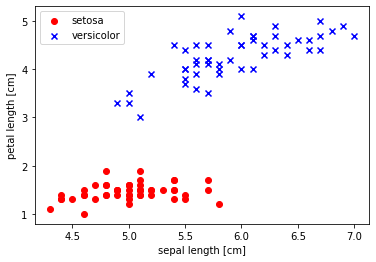

In [7]:
#select the setosa and versicolor
y = df.iloc[0:100,4].values
y = np.where(y== 'Iris-setosa',-1,1)

#extract sepal length and petal length
X = df.iloc[0:100,[0,2]].values
#plot data
plt.scatter(X[:50,0],X[:50,1],color = 'red',marker='o',label = 'setosa')
plt.scatter(X[50:1000,0],X[50:100,1],color = 'blue',marker='x',label = 'versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc = 'upper left')
plt.show()


Biểu đồ phân hoạch cho thấy sự phân bố của các mẫu hoa trong bộ dữ liệu Iris, dọc theo hai trục đặc điểm là chiều dài cánh hoa và chiều dài đài hoa. Trong không gian hai chiều này không gian con đặc trưng, có thể thấy rằng một ranh giới tuyến tính là đủ để tách Setosa khỏi hoa Versicolor. Do đó,lớp phân loại tuyến tính như perceptron sẽ có thể phân loại các bông hoa trong tập dữ liệu này một cách hoàn hảo.

Vẽ sơ đồ lỗi phân loại sai cho từng epoch để kiểm tra liệu thuật toán có hội tụ và tìm thấy ranh giới quyết định phân tách hai lớp hoa Iris:

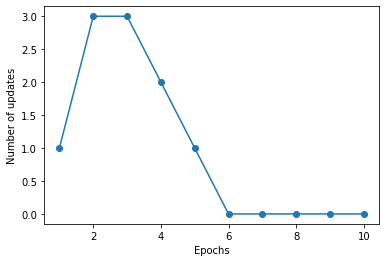

In [8]:
pnn = Perceptron(eta=0.1,n_iter =10)
pnn.fit(X,y)
plt.plot(range(1,len(pnn.errors_)+1),pnn.errors_,marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

Như chúng ta có thể thấy trong biểu đồ trước, perceptron hội tụ sau lần thứ sáu epoch và bây giờ có thể phân loại các mẫu đào tạo một cách hoàn hảo. Thực hiện một chức năng tiện lợi giúp trực quan hóa các ranh giới quyết định cho tập dữ liệu hai chiều:

In [9]:
def plot_decision_regions(X,y,classifier,resolution=0.02):
    # setup marker generator and color map
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    #plot the decision surface
    x1_min , x1_max = X[:,0].min() -1, X[:,0].max()+1
    x2_min , x2_max = X[:,1].min() -1, X[:,1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = 0.3, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(),xx2.max())

    #plot class samples
    for idx , cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl , 0],y=X[y == cl,1],alpha=0.8,c=colors[idx],marker=markers[idx],edgecolors='black')

Đầu tiên, xác định colors và markers và tạo một bản đồ màu từ danh sách các màu qua ListedColormap.
Sau đó, xác định minimum và maximum cho hai features và sử dụng các vectơ đó để tạo một cặp của các mảng lưới xx1 và xx2 thông qua meshgrid function của NumPy.


Sau khi định hình lại predict class Z thành một lưới có cùng kích thước như xx1 và xx2, giờ đây chúng ta có thể vẽ biểu đồ đường bao thông qua hàm contourf của Matplotlib,ánh xạ các vùng quyết định khác nhau thành các màu khác nhau cho từng lớp dự đoán
trong mảng lưới:

C:\Users\phamt\AppData\Local\Temp\ipykernel_15208\432682371.py:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl , 0],y=X[y == cl,1],alpha=0.8,c=colors[idx],marker=markers[idx],edgecolors='black')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


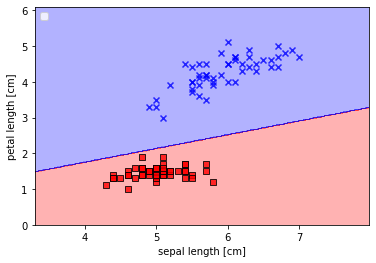

In [10]:
plot_decision_regions(X,y,classifier=pnn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc= 'upper left')
plt.show()

## **Adaptive linear neurous and the convergence of learning**

*Giới thiệu thuật toán ADLINE*


- Adaline được giới thiệu vào năm 1959 bởi Bernard Widrow và nghiên
cứu sinh tiến sĩ của ông Tedd Hoff chỉ một vài năm sau khi Frank
Rosenblatt's perceptron algorithm và có thể được coi là một cải tiến của
thuật toán
- Thuật toán Adaline đặc biệt thú vị vì nó minh họa khóa khái niệm xác
định và giảm thiểu các chức năng chi phí liên tục.
- Đây là nền tảng để hiểu cho phân nhóm các thuật toán Machine Learning,
logistic regression, Máy vectơ hỗ trợ và Phân tích hồi quy, mà chúng ta
sẽ thảo luận trong các chương trong tương lai.


*Sự khác biệt giữa quy tắc Adaline and Rosenblatt's perceptron:*

- là các trọng số được cập nhật dựa trên một hàm kích hoạt tuyến tính chứ
không phải là một hàm bước đơn vị như trong perceptron .Hàm kích
hoạt tuyến tính này $ \phi(z) $ chỉ đơn giản là hàm nhận dạng của đầu vào
mạng :


$$ \phi(w^T x) = w^T x $$

Trong khi hàm kích hoạt tuyến tính được sử dụng để học trọng số,
ADALINE vẫn sử dụng hàm ngưỡng để đưa ra dự đoán cuối cùng, tương
tự như hàm bước đơn vị mà perceptron. Sự khác biệt chính giữa
perceptron và Thuật toán Adaline được đánh dấu trong hình sau:

![anh](Untitled4.png)

Sự khác biệt là thuật toán Adaline so sánh các nhãn lớp thực với đầu ra
có giá trị liên tục của hàm kích hoạt tuyến tính để tính toán lỗi mô hình
và cập nhật trọng số, . Ngược lại, perceptron so sánh các nhãn lớp thực sự
với các nhãn lớp dự đoán.

## **Minimizing cost functions with gradient descent**

Một trong những thành phần chính của các thuật toán machine learning là
một chức năng khách quan được xác định sẽ được tối ưu hóa trong quá trình xử lý. Hàm ojective thường là một hàm chi phí mà chúng ta muốn
giảm thiểu. Trong ADALINE chúng ta có thể định nghĩa hàm chi phí J để
tìm hiểu các trọng số là **Sum of Squared Errors(SSE)** giữa kết quả được tính
toán và nhãn lớp thực:

$$ J(w) = 1/2 \sum_{i}(y(i) - \phi(z(i)))^2 $$

Nhân ½ để thuận tiện hơn, điều này sẽ giúp dễ dàng rút ra hơn độ dốc,
như chúng ta sẽ thấy trong các đoạn sau. Ưu điểm chính của hàm kích
hoạt tuyến tính liên tục này, trái ngược với hàm bước đơn vị, là hàm chi
phí trở nên khả vi. Một tính chất hay khác của hàm chi phí này là nó lồi;
do đó, chúng ta có thể sử dụng một thuật toán tối ưu hóa đơn giản nhưng
mạnh mẽ được gọi là giảm độ dốc để tìm các trọng số làm giảm thiểu
hàm chi phí của chúng ta nhằm phân loại các mẫu trong bộ dữ liệu Iris.

![anh](Untitled5.png)

Sử dụng giảm dần độ dốc, giờ đây chúng ta có thể cập nhật các trọng số
bằng cách thực hiện một bước theo hướng ngược lại với độ dốc $ \Delta J(w) $
của hàm chi phí $ J(w )$ :


$$ w := w + \Delta w $$

Trong đó thay đổi trọng số $ \Delta w $ được định nghĩa là độ dốc âm nhân với
tốc độ học $ \eta$  :


$$ \Delta w = - \eta \Delta J(w) $$

Để tính độ dốc của hàm chi phí, chúng ta cần tính đạo hàm riêng của hàm
chi phí đối với từng trọng số $ w_j $ :

$$ \frac{\partial J}{\partial w_j} = - \sum_{i}(y(i) - \phi(z(i))x_j $$

$$ \nabla w_j = - \eta \frac{\partial J}{\partial w_j} = \eta \sum_{i}(y(i) - \phi(z(i)) )x_j(i) $$

Cập nhật trọng số, quy tắc Adaline trở thành :
$$  w := w + \Delta w $$

Mặc dù quy tắc học Adaline trông giống hệt quy tắc perceptron, chúng ta nên
lưu ý rằng $ \phi(z)$ với $ z(i) = w^T x(i) $ là một số thực và không phải là nhãn lớp số nguyên.
Hơn nữa, cập nhật trọng số được tính toán dựa trên tất cả các mẫu trong tập mẫu
(thay vì cập nhật trọng số tăng dần sau mỗi mẫu), đó là lý do tại sao điều này
cách tiếp cận còn được gọi là giảm dần độ dốc hàng loạt.

## **Implementing Adaline in Python**

Vì quy tắc perceptron và Adaline rất giống nhau, nên ta sẽ triển khai
perceptron và thay đổi phương thức điều chỉnh sao cho các trọng số được
cập nhật bằng cách **giảm thiểu hàm chi phí** thông qua **giảm độ dốc** .


In [11]:
class AdaptiveLinearNeuron(object):
   def __init__(self, rate = 0.01, niter = 10):
      self.rate = rate
      self.niter = niter

   def fit(self, X, y):
      """Fit training data
      X : Training vectors, X.shape : [#samples, #features]
      y : Target values, y.shape : [#samples]
      """

      # weights
      self.weight = np.zeros(1 + X.shape[1])

      # Number of misclassifications
      self.errors = []

      # Cost function
      self.cost = []

      for i in range(self.niter):
         output = self.net_input(X)
         errors = y - output
         self.weight[1:] += self.rate * X.T.dot(errors)
         self.weight[0] += self.rate * errors.sum()
         cost = (errors**2).sum() / 2.0
         self.cost.append(cost)
      return self

   def net_input(self, X):
      """Calculate net input"""
      return np.dot(X, self.weight[1:]) + self.weight[0]

   def activation(self, X):
      """Compute linear activation"""
      return self.net_input(X)

   def predict(self, X):
      """Return class label after unit step"""
      return np.where(self.activation(X) >= 0.0, 1, -1)

Trong thực tế, thường yêu cầu một số thử nghiệm để tìm ra tốc độ học
tốt η để hội tụ tối ưu. Vì vậy, hãy chọn hai tốc độ học khác nhau, η = 0,01
và η = 0,0001, để bắt đầu và vẽ biểu đồ hàm chi phí so với số lượng kỷ
nguyên để xem việc triển khai Adaline học từ dữ liệu đào tạo tốt như thế
nào.

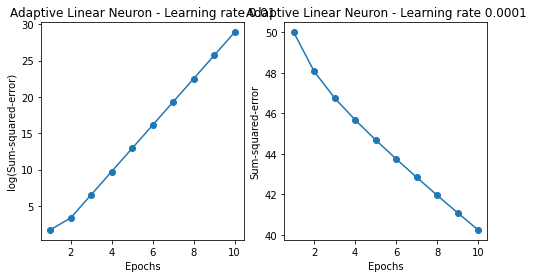

In [12]:

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

# learning rate = 0.01
aln1 = AdaptiveLinearNeuron(0.01, 10).fit(X,y)

ax[0].plot(range(1, len(aln1.cost) + 1), np.log10(aln1.cost), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaptive Linear Neuron - Learning rate 0.01')

# learning rate = 0.01
aln2 = AdaptiveLinearNeuron(0.0001, 10).fit(X,y)

ax[1].plot(range(1, len(aln2.cost) + 1), aln2.cost, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaptive Linear Neuron - Learning rate 0.0001')
plt.show()

+ Hình bên trái cho thấy điều gì có thể xảy ra nếu chúng ta chọn tốc độ
học quá lớn. Thay vì giảm thiểu hàm chi phí, sai số trở nên lớn hơn trong
mọi thời đại vì chúng tôi vượt quá mức tối thiểu toàn cầu.

+ Mặt khác, chúng ta có thể thấy rằng chi phí giảm đối với lô đất ở phía
bên phải. Đó là bởi vì đã chọn tốc độ học η = 0.0001 nhỏ đến mức thuật
toán sẽ yêu cầu một số lượng rất lớn các kỷ nguyên để hội tụ.

 Đây là minh họa cách chúng ta thay đổi giá trị của một tham số trọng số
cụ thể để giảm thiểu hàm chi phí J (bên trái). Hình bên phải minh họa
điều gì sẽ xảy ra nếu chúng ta chọn tốc độ học quá lớn, chúng ta vượt quá
mức tối thiểu chung:

![anh](Untitled6.png)

## **Improving gradient descent throug feature scaling**

Feature scaling là một phương pháp được sử dụng để chuẩn hóa phạm
vi của các biến độc lập hoặc tính năng của dữ liệu. Trong xử lý dữ liệu,
nó còn được gọi là chuẩn hóa dữ liệu và thường được thực hiện trong
bước tiền xử lý dữ liệu.

**Gradient descent** là một trong nhiều thuật toán được hưởng lợi từ việc
chia tỷ lệ đối tượng địa lý.

chúng ta sẽ sử dụng một phương pháp chia tỷ lệ đối tượng được gọi
là **tiêu chuẩn hóa** , phương pháp này cung cấp cho dữ liệu của chúng tôi
thuộc tính của một **phân phối chuẩn thông thường** .


**Tiêu chuẩn hóa tính năng** làm cho các giá trị của từng tính năng trong
dữ liệu có **giá trị trung bình bằng 0** (khi trừ giá trị trung bình trong điều
tra viên) và **phương sai đơn vị**

Phương pháp này được sử dụng rộng rãi để chuẩn hóa trong nhiều
machine learning algorithms (logistic regression, Máy vectơ hỗ trợ và
Phân tích hồi quy).


Điều này thường được thực hiện bằng cách tính điểm tiêu chuẩn .
Phương pháp tính toán chung là xác định giá trị trung bình phân phối và
độ lệch chuẩn cho từng đối tượng địa lý. Tiếp theo, chúng tôi trừ giá trị
trung bình từ mỗi tính năng. Sau đó, chúng ta chia các giá trị (giá trị
trung bình đã bị trừ) của từng tính năng cho độ lệch chuẩn của nó.

$$ x'_j = \frac{x_j - \mu_j}{\sigma_j} $$

Một trong những lý do tại sao tiêu chuẩn hóa giúp học tập giảm dần độ dốc
là trình tối ưu hóa phải thực hiện ít bước hơn để tìm ra giải pháp tốt hoặc tối
ưu (chi phí toàn cầu tối thiểu), như được minh họa trong hình dưới đây,
trong đó các hình con biểu thị bề mặt chi phí như một chức năng của hai
trọng số mô hình trong một vấn đề phân loại hai chiều:


![anh](Untitled7.png)

Chúng ta có thể chuẩn hóa bằng cách sử dụng các phương thức
NumPy mean và std :


In [14]:
# standardize
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()


- Sau khi chuẩn hóa, chúng ta sẽ huấn luyện lại mô hình Tuyến tính bằng
cách sử dụng tốc độ học tập không quá nhỏ của η = 0.01:


C:\Users\phamt\AppData\Local\Temp\ipykernel_15208\432682371.py:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl , 0],y=X[y == cl,1],alpha=0.8,c=colors[idx],marker=markers[idx],edgecolors='black')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


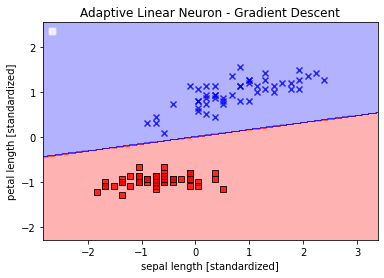

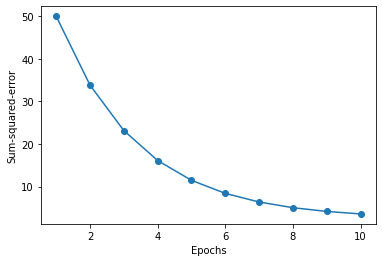

In [15]:

# learning rate = 0.01
aln = AdaptiveLinearNeuron(0.01, 10)
aln.fit(X_std,y)

# decision region plot
plot_decision_regions(X_std, y, classifier=aln)

plt.title('Adaptive Linear Neuron - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()

plt.plot(range(1, len(aln.cost) + 1), aln.cost, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()

Như chúng ta có thể thấy trong các biểu đồ, Adaline hiện đã hội tụ sau
khi đào tạo về các tính năng được tiêu chuẩn hóa bằng cách sử dụng tỷ lệ
học tập η = 0,01. Tuy nhiên, lưu ý rằng SSE vẫn khác không mặc dù tất
cả các mẫu đã được phân loại chính xác.

## **Large-scale machine learning and stochastic gradient descent**

![anh](Untitled8.png)

Giảm độ dốc ngẫu nhiên (SGD) là một giá trị gần đúng của độ dốc giảm
dần, tuy nhiên, nó thường đạt đến sự hội tụ nhanh hơn nhiều do cập nhật
trọng số thường xuyên hơn.


Vì mỗi độ dốc được tính toán dựa trên một ví dụ đào tạo duy nhất, như
được hiển thị trong mẫu của phần trước, nên lỗi sẽ ồn hơn so với độ dốc
gốc, điều này cũng có thể có lợi thế là việc giảm độ dốc ngẫu nhiên có
thể thoát khỏi cực tiểu cục bộ nông dễ dàng hơn

Để thu được kết quả chính xác thông qua giảm dần độ dốc ngẫu nhiên,
điều quan trọng là phải trình bày dữ liệu đó theo **thứ tự ngẫu nhiên** , đó
là lý do tại sao chúng tôi muốn **xáo trộn** tập huấn luyện cho mỗi kỷ
nguyên để ngăn chặn các chu kỳ.

Một ưu điểm khác của việc giảm độ dốc ngẫu nhiên là chúng ta có thể sử
dụng nó để học trực tuyến. Trong học tập trực tuyến, mô hình của chúng
tôi được đào tạo nhanh chóng khi có dữ liệu đào tạo mới. Điều này đặc
biệt hữu ích nếu chúng ta đang tích lũy một lượng lớn dữ liệu, chẳng hạn
như dữ liệu khách hàng trong các ứng dụng web. Sử dụng học trực tuyến,
hệ thống có thể ngay lập tức thích ứng với các thay đổi và dữ liệu đào tạo
có thể bị hủy sau khi cập nhật mô hình nếu không gian lưu trữ có vấn đề.


Với phương pháp giảm độ dố chúng ta cần thực hiện một vài điều chỉnh
đối với thuật toán học hiện có để cập nhật trọng số thông qua giảm độ
dốc ngẫu nhiên

Bên trong phương thức điều chỉnh , bây giờ chúng tôi sẽ cập nhật trọng
số sau mỗi mẫu đào tạo.

Hơn nữa, chúng tôi sẽ triển khai một phương pháp **partial_fit** bổ sung ,
không khởi tạo lại các trọng số, cho học trực tuyến .

Để kiểm tra xem thuật toán của chúng tôi có hội tụ sau khi đào tạo hay
không, chúng tôi sẽ tính chi phí là chi phí trung bình của các mẫu đào tạo
trong mỗi lần lặp.

Ngoài ra, chúng tôi sẽ xáo trộn dữ liệu đào tạo trước mỗi kỷ nguyên để
tránh các chu kỳ khi chúng tôi tối ưu hóa hàm chi phí thông qua tham
số **Random_state .**


Hàm **np.random.permutationpermutation** trong **suffle_set()** tạo ra một
chuỗi ngẫu nhiên các số duy nhất trong phạm vi từ 0 đến 100.

In [18]:
# Stochastic Gradient Descent
class SGD(object):
   def __init__(self, rate = 0.01, niter = 10,
                shuffle=True, random_state=None):
      self.rate = rate
      self.niter = niter
      self.weight_initialized = False

      # If True, Shuffles training data every epoch
      self.shuffle = shuffle

      # Set random state for shuffling and initializing the weights.
      if random_state:
         seed(random_state)

   def fit(self, X, y):
      """Fit training data
      X : Training vectors, X.shape : [#samples, #features]
      y : Target values, y.shape : [#samples]
      """

      # weights
      self.initialize_weights(X.shape[1])

      # Cost function
      self.cost = []

      for i in range(self.niter):
         if self.shuffle:
            X, y = self.shuffle_set(X, y)
         cost = []
         for xi, target in zip(X, y):
            cost.append(self.update_weights(xi, target))
         avg_cost = sum(cost)/len(y)
         self.cost.append(avg_cost)
      return self

   def partial_fit(self, X, y):
      """Fit training data without reinitializing the weights"""
      if not self.weight_initialized:
         self.initialize_weights(X.shape[1])
      if y.ravel().shape[0] > 1:
         for xi, target in zip(X, y):
            self.update_weights(xi, target)
      else:
         self.up
      return self

   def shuffle_set(self, X, y):
      """Shuffle training data"""
      r = np.random.permutation(len(y))
      return X[r], y[r]

   def initialize_weights(self, m):
      """Initialize weights to zeros"""
      self.weight = np.zeros(1 + m)
      self.weight_initialized = True

   def update_weights(self, xi, target):
      """Apply SGD learning rule to update the weights"""
      output = self.net_input(xi)
      error = (target - output)
      self.weight[1:] += self.rate * xi.dot(error)
      self.weight[0] += self.rate * error
      cost = 0.5 * error**2
      return cost

   def net_input(self, X):
      """Calculate net input"""
      return np.dot(X, self.weight[1:]) + self.weight[0]

   def activation(self, X):
      """Compute linear activation"""
      return self.net_input(X)

   def predict(self, X):
      """Return class label after unit step"""
      return np.where(self.activation(X) >= 0.0, 1, -1)

def plot_decision_regions(X, y, classifier, resolution=0.02):
   # setup marker generator and color map
   markers = ('s', 'x', 'o', '^', 'v')
   colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
   cmap = ListedColormap(colors[:len(np.unique(y))])

   # plot the decision surface
   x1_min, x1_max = X[:,  0].min() - 1, X[:, 0].max() + 1
   x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
   np.arange(x2_min, x2_max, resolution))
   Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
   Z = Z.reshape(xx1.shape)
   plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
   plt.xlim(xx1.min(), xx1.max())
   plt.ylim(xx2.min(), xx2.max())

   # plot class samples
   for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
      alpha=0.8, c=cmap(idx),
      marker=markers[idx], label=cl)

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values

# standardize
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

sgd = SGD(niter=15, rate=0.01, random_state=1)
sgd.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=sgd)
plt.title('SGD - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()
plt.plot(range(1, len(sgd.cost) + 1), sgd.cost, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.show()

NameError: name 'seed' is not defined

## **Summary**